# Abdullah Alhussni - aa10108
## Applied Machine Learning - ENGR-UH 3332 - Lab 1L

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import warnings

## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     bc = load_breast_cancer()
     X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# appending ones to the training and test data
m_train = X_train_scaled.shape[0]
X_train_scaled = np.append(X_train_scaled, np.ones((m_train, 1)), axis = 1)
m_test = X_test_scaled.shape[0]
X_test_scaled = np.append(X_test_scaled, np.ones((m_test, 1)), axis = 1)

In [2]:
def sigmoid(X, theta):
    z = np.dot(X, theta)
    z = np.clip(z, -30, 30)  # I'm getting runtime errors despite scaling the values, so I decided to clip them
    return 1 / (1 + np.exp(-z))

def loss(X, y, theta): # or -log(likelihood)
    loss = 0
    for i in range(len(y)):
        z = sigmoid(X[i, :], theta)
        if y[i] == 1:
            loss += -1 * np.log(z)
        elif y[i] == 0:
            loss += -1 * np.log(1 - z)
    return loss

def gradient_loss(X, y, theta):
    return np.dot(sigmoid(X, theta) - y, X)

def gradient_descent(eta, n_iterations, X, y, theta0):
    loss_values = []
    theta = theta0
    loss_values.append(loss(X, y, theta))
    for iteration in range(n_iterations):
        y_pred = sigmoid(X, theta)
        grad = gradient_loss(X, y, theta)
        theta = theta - eta * grad
        if iteration % 100 == 0:
            loss_values.append(loss(X, y, theta))
    return loss_values, theta

def predict(X, theta, threshold):
    return sigmoid(X, theta) - threshold >= 0

In [3]:
theta0 = np.random.randn(X.shape[1] + 1) # initializing weights

eta = 0.5
n_iterations = 5000
threshold = 0.5

loss_values, theta = gradient_descent(eta, n_iterations, X_train_scaled, y_train, theta0)
print("Final weights:", theta)

y_pred = predict(X_test_scaled, theta, threshold)

Final weights: [  8.11815092  -5.16354087  12.53472732  -1.69092609  -1.76602727
  60.96242372 -32.15541526 -39.83635287  20.90710832 -23.95942029
 -64.07858808   2.86585406  24.85351732 -34.28438109   0.45941647
 -20.7785735   38.98144127 -36.01597639  22.75600913  26.08453018
 -17.55873995 -20.13779019  13.65099622 -19.66781626   8.47319283
  16.37140626 -44.35603355 -25.2550481  -51.71848908  13.45688217
  -5.19849106]


In [4]:
# My own calculations to compare to the built-in functions:
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FN = np.sum((y_test == 1) & (y_pred == 0))

precision = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TP + FP + TN + FN)
f1 = 2 * precision * recall / (precision + recall)
conf_matrix = [[TN, FP], [FN, TP]]
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index = ['Actual 0', 'Actual 1'],
                              columns = ['Predicted 0', 'Predicted 1'])

print("My Functions:")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"Accuracy: {accuracy:.2%}")
print(f"F1 Score: {f1:.2%}")
print(conf_matrix_df)
print("\n")
print("Library Functions:")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index = ['Actual 0', 'Actual 1'],
                              columns = ['Predicted 0', 'Predicted 1'])

print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"Accuracy: {accuracy:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Confusion Matrix:")
print(conf_matrix_df)

My Functions:
Precision: 97.20%
Recall: 93.92%
Accuracy: 94.30%
F1 Score: 95.53%
          Predicted 0  Predicted 1
Actual 0           76            4
Actual 1            9          139


Library Functions:
Precision: 97.20%
Recall: 93.92%
Accuracy: 94.30%
F1 Score: 95.53%
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           76            4
Actual 1            9          139


I did the calculations to verify the built-in functions, and the results are exact.

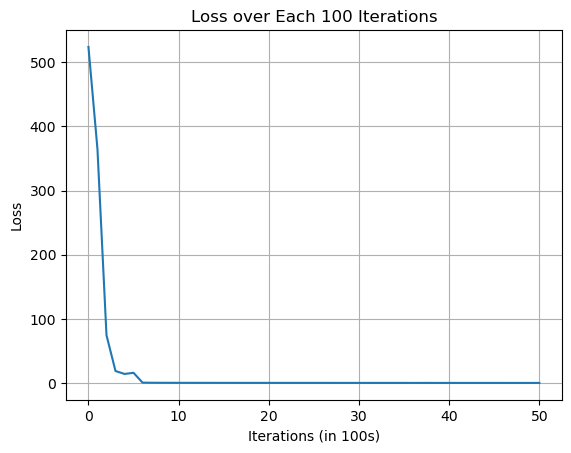

In [5]:
plt.plot(range(n_iterations // 100 + 1), loss_values)
plt.xlabel('Iterations (in 100s)')
plt.ylabel('Loss')
plt.title('Loss over Each 100 Iterations')
plt.grid(True)
plt.show()

# Testing Different Learning Rates and Maximum Iterations

In [6]:
eta = np.logspace(-7, 0, 15)

precisions = []
recalls = []
accuracies = []
f1_scores = []

for i in range(len(eta)):
    theta0 = np.random.randn(X.shape[1] + 1) # initializing weights
    n_iterations = 2000 * (len(eta) - i)
    loss_values, theta = gradient_descent(eta[i], int(n_iterations), X_train_scaled, y_train, theta0)
    y_pred = predict(X_test_scaled, theta, threshold)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

max_precision = np.max(precisions)
i_optimal = np.argmax(precisions)
max_recall = np.max(recalls)
j_optimal = np.argmax(recalls)
max_accuracy = np.max(accuracies)
k_optimal = np.argmax(accuracies)
max_f1_score = np.max(f1_scores)
l_optimal = np.argmax(f1_scores)

print(f"Precision of training data for optimal eta: {max_precision * 100:.2f}%")
print(f"Optimal eta: {eta[i_optimal]}")
print(f"Recall of training data for optimal eta: {max_recall * 100:.2f}%")
print(f"Optimal eta: {eta[j_optimal]}")
print(f"Accuracy of training data for optimal eta: {max_accuracy * 100:.2f}%")
print(f"Optimal eta: {eta[k_optimal]}")
print(f"f1 score of training data for optimal eta: {max_f1_score * 100:.2f}%")
print(f"Optimal eta: {eta[l_optimal]}")

Precision of training data for optimal eta: 99.32%
Optimal eta: 3.162277660168379e-06
Recall of training data for optimal eta: 98.65%
Optimal eta: 3.162277660168379e-06
Accuracy of training data for optimal eta: 98.68%
Optimal eta: 3.162277660168379e-06
f1 score of training data for optimal eta: 98.98%
Optimal eta: 3.162277660168379e-06


Through many experiments and multiple criteria (precision, recall, accuracy, and f1 score), we realize eta = 0.00003 (or anything between 10^-5 and 10^-4) is approximately the best learning rate for logistic regression, for around 20k iterations, or at least for our current dataset. For eta = 0.5, it seems that loss stabilizes after 700 iterations, so running it for more than 1000 iterations is not efficient. n_iterations = 1000 would be ideal.

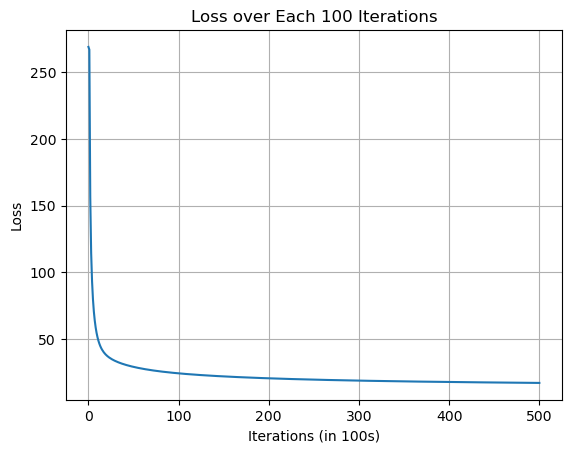

In [7]:
theta0 = np.random.randn(X.shape[1] + 1) # initializing weights

eta = 0.00003
n_iterations = 50000
threshold = 0.01

loss_values, theta = gradient_descent(eta, n_iterations, X_train_scaled, y_train, theta0)

y_pred = predict(X_test_scaled, theta, threshold)

plt.plot(range(n_iterations // 100 + 1), loss_values)
plt.xlabel('Iterations (in 100s)')
plt.ylabel('Loss')
plt.title('Loss over Each 100 Iterations')
plt.grid(True)
plt.show()

In [8]:
y_pred = predict(X_test_scaled, theta, threshold)
precisions.append(precision_score(y_test, y_pred))
recalls.append(recall_score(y_test, y_pred))
accuracies.append(accuracy_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index = ['Actual 0', 'Actual 1'],
                              columns = ['Predicted 0', 'Predicted 1'])

print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"Accuracy: {accuracy:.2%}")
print(f"F1 Score: {f1:.2%}")
print("Confusion Matrix:")
print(conf_matrix_df)

Precision: 91.93%
Recall: 100.00%
Accuracy: 94.30%
F1 Score: 95.79%
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           67           13
Actual 1            0          148


We see a great increase in all criteria with the change of hyperparameters, and we can safely conclude that eta = 0.00003 and there isn't much increase in the criteria beyond n_iterations = 10000 (although loss decreases significantly, but without affecting the precision parameters), so we can choose that value. We notice how changing the threshold close to 1 increases precision and reduces other criteria, while changing it to a value close to 0 decreases precision and increases other criteria, especially recall. 0.5 seems like a good value, but in need of extra caution and more false positives than false negatives, we would seek higher recall and lower precision, which means even threshold = 0.01 (in other words, predicting 1% probability of breast cancer as positive), could be better. However, it depends on the objectives, so 0.01 is by no means the ideal threshold, but the one I deemed the best.